<a href="https://colab.research.google.com/github/Pratheek-05/ShadowFox-internship/blob/main/Beginner_task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# No need to install anything on Colab – TensorFlow is pre-installed
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

In [ ]:
# Load the Cats vs Dogs dataset
(train_ds, val_ds), ds_info = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:]'],
    as_supervised=True,
    with_info=True
)

# Resize images and normalize pixel values
IMG_SIZE = 128

def format_image(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image = tf.cast(image, tf.float32) / 255.0  # Normalize
    return image, label

train_ds = train_ds.map(format_image).shuffle(1000).batch(32).prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.map(format_image).batch(32).prefetch(tf.data.AUTOTUNE)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.DO4KQB_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=5
)

Epoch 1/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 35s 50ms/step - accuracy: 0.5692 - loss: 0.6737 - val_accuracy: 0.7085 - val_loss: 0.5555
Epoch 2/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 26s 43ms/step - accuracy: 0.7400 - loss: 0.5217 - val_accuracy: 0.7749 - val_loss: 0.4668
Epoch 3/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 26s 44ms/step - accuracy: 0.8053 - loss: 0.4203 - val_accuracy: 0.8280 - val_loss: 0.3955
Epoch 4/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 26s 43ms/step - accuracy: 0.8462 - loss: 0.3474 - val_accuracy: 0.8272 - val_loss: 0.3922
Epoch 5/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 27s 44ms/step - accuracy: 0.8888 - loss: 0.2696 - val_accuracy: 0.8207 - val_loss: 0.4532


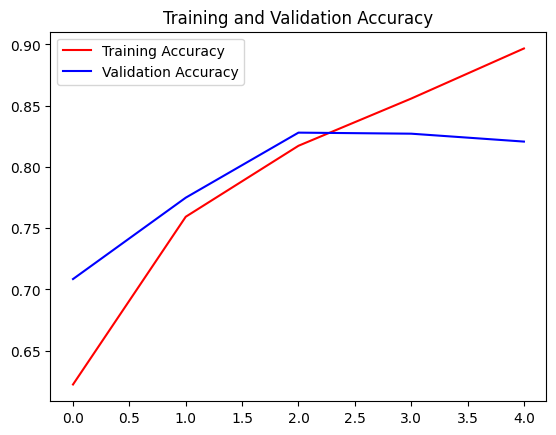

In [ ]:
# Plot training accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step


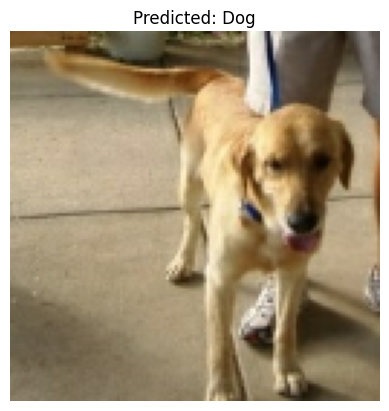

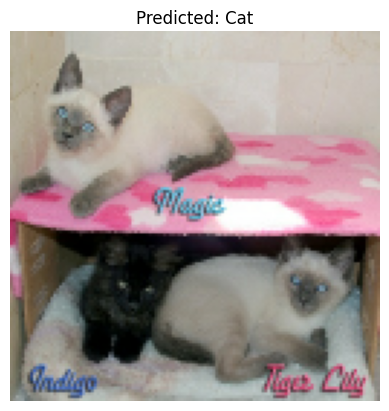

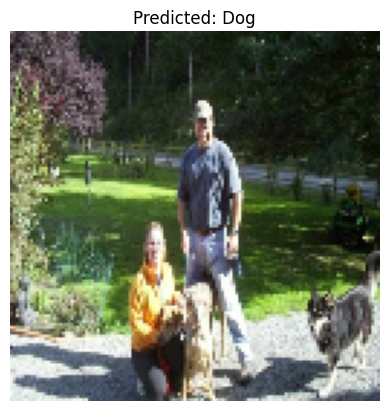

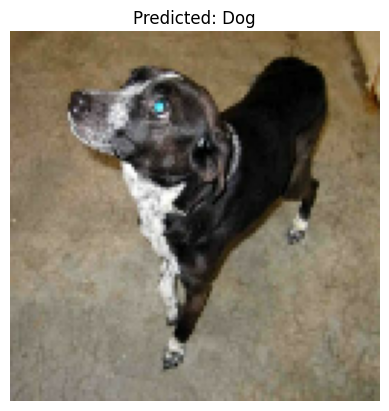

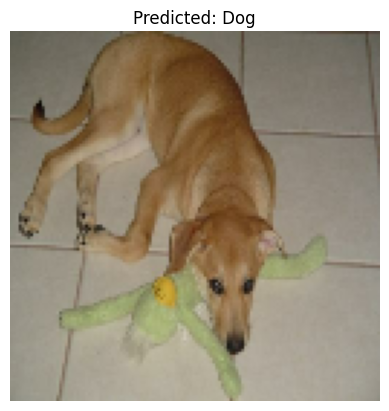

In [ ]:
# Take one batch from validation dataset
for images, labels in val_ds.take(1):
    preds = model.predict(images)
    for i in range(5):
        plt.imshow(images[i])
        plt.title(f"Predicted: {'Dog' if preds[i][0] > 0.5 else 'Cat'}")
        plt.axis('off')
        plt.show()